In [38]:
import numpy as np
import pandas as pd
import os
import re

In [12]:
#Path to csv files
csv_path = './data/movie_metadata/movie_meta_data.csv'
#Path to directory containing the scripts
scripts_directory = './data/screenplay_data/data/raw_texts/raw_texts' 

In [74]:
#Load the csv data
df = pd.read_csv(csv_path)

df['script'] = None 

In [75]:
print(f'Total number of rows in dataset: {len(df)}')

Total number of rows in dataset: 2858


In [76]:
#code to map the scripts to the movie in the csv file
count = 0
read_err = 0
#iterate through each row of the dataframe
for index, row in df.iterrows():
    movieid = str(row['imdbid'])
    #add zeros to the movie_id if it's length is less than zero
    if len(movieid)<7:
        movieid = movieid.zfill(7)
    title = row['title']
    #remove extra non-alphanumeric characters from the title
    title = re.sub('[().,:&?!]', '', title)
    title = re.sub('[-\'/]', ' ', title)
    #create the filename by concatenating the title and movie_id
    filename = title + '_' + movieid+'.txt'  
    file_path = scripts_directory + '/' + filename
    #try to open read the file at file_path
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            script = file.read()
        #add the contents of the file to the csv
        df.at[index, 'script'] = script
    #if file not found, print the error statement
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        count +=1
    #if there's an error reading the file 
    except Exception as e:
        print(f"Error reading {file_path}: {str(e)}")
        read_err +=1

print(f'Files not found: {count}\nReading error: {read_err}')

Error reading ./data/screenplay_data/data/raw_texts/raw_texts/The Deep End of the Ocean_0120646.txt: 'utf-8' codec can't decode byte 0x82 in position 25936: invalid start byte
Error reading ./data/screenplay_data/data/raw_texts/raw_texts/Going for the Gold The Bill Johnson Story_0089212.txt: 'utf-8' codec can't decode byte 0x8d in position 1412: invalid start byte
Error reading ./data/screenplay_data/data/raw_texts/raw_texts/The Adventures of Priscilla Queen of the Desert_0109045.txt: 'utf-8' codec can't decode byte 0x85 in position 1547: invalid start byte
Error reading ./data/screenplay_data/data/raw_texts/raw_texts/Working Girl_0096463.txt: 'utf-8' codec can't decode byte 0xe9 in position 20481: invalid continuation byte
Error reading ./data/screenplay_data/data/raw_texts/raw_texts/Halloween_0296665.txt: 'utf-8' codec can't decode byte 0x92 in position 289: invalid start byte
Error reading ./data/screenplay_data/data/raw_texts/raw_texts/The House Next Door_0286702.txt: 'utf-8' codec

In [79]:
df['script'].isnull().sum()

200

In [85]:
#remove all rows that do not contain a script
df_not_null = df[df['script'].notna()]

In [93]:
#remove all movies that have a rating of less than 0
df_clean = df_not_null[df_not_null['imdb user rating']>0]

In [95]:
df_clean['imdb user rating'].unique()

array([6, 3, 8, 7, 5, 9, 4, 2, 1], dtype=int64)

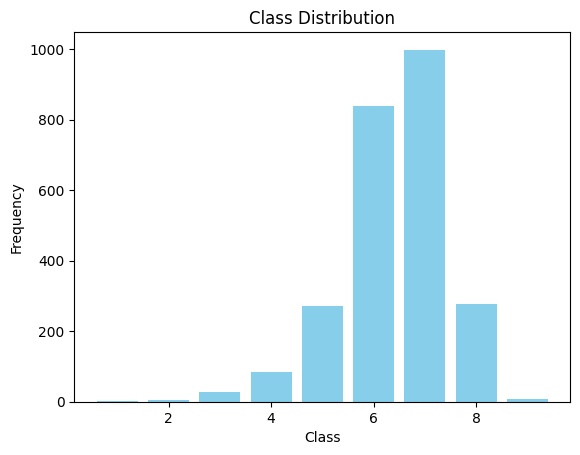

In [98]:
#visualizing the class distribution
import matplotlib.pyplot as plt
# Using matplotlib directly
plt.bar(df_clean['imdb user rating'].value_counts().index, df_clean['imdb user rating'].value_counts().values, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()


In [99]:
#number of elements in every class
df_clean['imdb user rating'].value_counts()

imdb user rating
7    998
6    838
8    276
5    272
4     84
3     28
9      7
2      4
1      1
Name: count, dtype: int64

In [105]:
df_clean['script']

0       \n\n\t\t\t    A NIGHT AT THE ROXBURY \n\n\n\t\...
1       AT FIRST SIGHT\n\nEXT. VALLEY - DUSK \nGold li...
3       \t\t\t\tBamboozled\n\n\t\t\t\tby\n\n\t\t\t\tSp...
4       \n\n\t\t\tTHE BIG LEBOWSKI\n\nWe are floating ...
5       Boys on the Side\n\nSCENE 1\n\nJANE\nThank you...
                              ...                        
2852    WAR OF THE WORLDS\n\nscreenplay by\nJosh Fried...
2853    June 29, 1994\n\nWHILE YOU WERE SLEEPING...\n\...
2855    WIND RIVER\n\nWritten by\n\nTaylor Sheridan\n
...
2856    WRONGFULLY ACCUSED\n\nBy\n\nPat Proft\n\nPROFT...
2857    YOU\n\nWERE\n\nNEVER\n\nREALLY\n\nHERE.\n\nScr...
Name: script, Length: 2384, dtype: object

In [107]:
#replacing the \n and \t characters in the scripts
df_clean['script'] = df_clean['script'].str.replace('\n', '', regex=False)
df_clean['script'] = df_clean['script'].str.replace('\t', '', regex=False)

In [109]:
#save dataframe as csv file
df_clean.to_csv('scripts.csv', index=False)